In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import math
import matplotlib.pyplot as plt

# load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# split data
num_data = 500
train_x = train_x[:num_data]
train_y = train_y[:num_data]


# preprocess (one hot encoding)
np.set_printoptions(linewidth=200)
print('Before preprocess x \n', np.array(train_x[0]), '\n')
print('Before preprocess y \n', np.array(train_y[0]), '\n')

x = np.array([[[1 if dd > 0 else 0 for dd in m] for m in x] for x in train_x]) # change value to 1 if member train_x value more than 0
y = to_categorical(train_y)

print('After preprocess \n', np.array(x[0]))
print('After preprocess y \n', np.array(y[0]))

x = np.array([x.flatten() for x in x])

Before preprocess x 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

In [6]:
# mlp
input = x
target = y

# config
num_input = input.shape[1]
num_hidden = 30
num_output = target.shape[1]

# sigmoid func
def sigmoid(x):
  return 1/(1 + math.exp(-x))

sig = np.vectorize(sigmoid)

In [7]:
# initialize weight and bias

b_hidden = np.random.uniform(low=-1, high=1, size=(num_hidden))
w_hidden = np.random.uniform(low=-1, high=1, size=(num_input, num_hidden))

print('w_hidden:', w_hidden)
print('b_hidden:', b_hidden)
print('\n')

b_output = np.random.uniform(low=-1, high=1, size=(num_output))
w_output = np.random.uniform(low=-1, high=1, size=(num_hidden, num_output))

print('w_output:', w_output)
print('b_output:', b_output)

w_hidden: [[-1.10105921  1.33876416  0.79701496 ... -1.42795032  1.00499773  2.63388975]
 [ 0.74323731 -2.36783271  2.17251955 ...  1.30343488  1.07295922 -2.65397517]
 [ 1.77627636 -2.24078257  1.08876232 ... -0.02107196 -2.64686288  2.21802082]
 ...
 [ 2.31037972 -0.63850262 -2.34327947 ... -2.17527563  2.59822912 -0.67784686]
 [ 1.12588806 -1.0142345   1.72269699 ...  2.68854723 -2.73673641 -1.83100721]
 [ 0.46389232  2.99216883  2.31534231 ... -1.51439684  2.4423046   1.79546742]]
b_hidden: [-1.91146228  0.5801747  -2.08373757  1.5147185   0.0647356  -2.47075752 -2.43888343  1.63195488  2.01509913 -1.86217564  2.4990836   0.40947531 -1.2307795   1.78320794  0.75716391 -0.91086459
  1.16047216 -0.20189308  1.9136347  -1.96399285  2.81402966  1.8289035  -1.57972789 -2.40574727  2.02464859 -0.6032486   2.01791313  2.60396313  0.37470634 -1.77008253]


w_output: [[ 2.00922252 -0.88662764  1.92628029  0.93873662  1.92537676  1.80278828  1.91500643  1.43864596  1.14726396 -0.25708797]
 [

In [8]:
# loss and accuracy
loss_values = []
acc_values = []

lr = 0.5
epochs = 50

for epoch in range(epochs):
  MSE = 0
  new_target = np.zeros(target.shape)

  for idx, inp in enumerate(input): # feedforward
    # hidden layer
    o_hidden = np.matmul(input[idx], w_hidden) + b_hidden
    o_hidden = sig(o_hidden)

    # print('----------------')
    # print(f'input[{idx}]:', input[idx], 'w_hidden:', w_hidden, 'b_hidden:', b_hidden)
    # print('o_hidden:', o_hidden)
    # print('\n')

    # output layer
    o_output = np.matmul(o_hidden, w_output)
    o_output = sig(o_output)

    # print('o_hidden', o_hidden, 'w_output:', w_output, 'b_output:', b_output)
    # print('o_output:', o_output)
    # print('\n')

    # count error
    error = target[idx] - o_output
    MSE += ((np.sum(error**2)) / error.shape)

    new_target[idx] = o_output.round()
    eh = error @ w_output.T # error hidden

    # print('error', error)
    # print('eh', eh)
    # print(f'new_target[{idx}]:', new_target[idx])
    # print('\n')


    # backpropagation (using formula for sigmoid func)
    w_output = w_output + (lr * (error * o_output * (1 - o_output)) * o_hidden[np.newaxis].T)
    b_output = b_output + (lr * (error * o_output * (1 - o_output)))

    w_hidden = w_hidden + (lr * (eh * o_hidden * (1 - o_hidden)) * input[idx][np.newaxis].T)
    b_hidden = b_hidden + (lr * (eh * o_hidden * (1 - o_hidden)))

  MSE = (MSE/input.shape[0])

  delta = np.absolute(target - new_target)
  acc = 1 - np.average([np.max(m) for m in delta])

  loss_values.append(MSE)
  acc_values.append(acc)

  print('epoch:', epoch, '|', 'error:', MSE, 'acc:', acc)
  # print('----------------')
  # print('\n')


epoch: 0 | error: [0.09977917] acc: 0.08199999999999996
epoch: 1 | error: [0.07375215] acc: 0.19999999999999996
epoch: 2 | error: [0.0641719] acc: 0.32199999999999995
epoch: 3 | error: [0.05873058] acc: 0.376
epoch: 4 | error: [0.05282338] acc: 0.44599999999999995
epoch: 5 | error: [0.05054596] acc: 0.482
epoch: 6 | error: [0.04481915] acc: 0.54
epoch: 7 | error: [0.03688199] acc: 0.6599999999999999
epoch: 8 | error: [0.03949209] acc: 0.61
epoch: 9 | error: [0.03533457] acc: 0.6659999999999999
epoch: 10 | error: [0.03123976] acc: 0.72
epoch: 11 | error: [0.02758384] acc: 0.752
epoch: 12 | error: [0.02603103] acc: 0.772
epoch: 13 | error: [0.0230709] acc: 0.802
epoch: 14 | error: [0.02207826] acc: 0.81
epoch: 15 | error: [0.02057807] acc: 0.8140000000000001
epoch: 16 | error: [0.01724811] acc: 0.85
epoch: 17 | error: [0.0154819] acc: 0.868
epoch: 18 | error: [0.0139235] acc: 0.882
epoch: 19 | error: [0.01351339] acc: 0.888
epoch: 20 | error: [0.01413305] acc: 0.874
epoch: 21 | error: [0

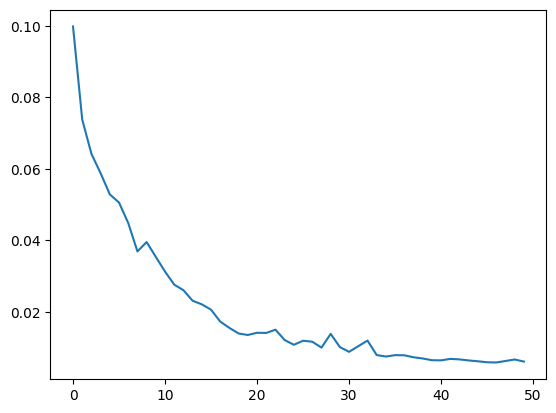

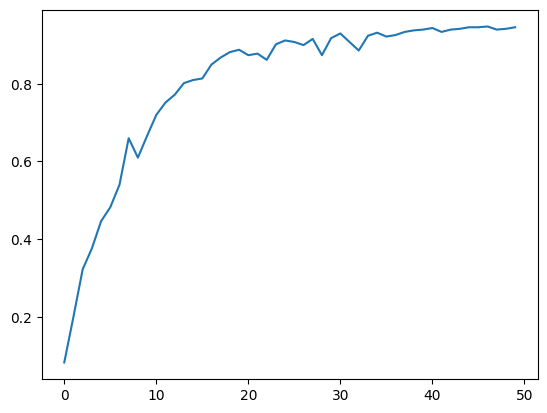

In [9]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.show()

In [10]:
new_target_test = np.zeros(target.shape)

# feedforward
for idx, inp in enumerate(input):
  o_hidden = np.matmul(input[idx], w_hidden) + b_hidden
  o_hidden = sig(o_hidden)

  o_output = np.matmul(o_hidden, w_output)
  o_output = sig(o_output)

  new_target_test[idx] = o_output.round()

reshape_input[idx_test] [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 

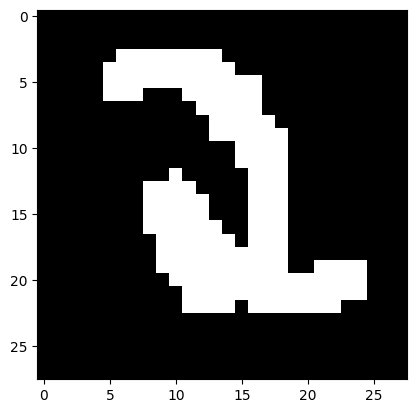

In [12]:
idx_test = 400

reshape_input = input.reshape(num_data, 28, 28)
print('reshape_input[idx_test]', reshape_input[idx_test])

test_target = new_target_test[idx_test]
print('test_target', test_target)
max_index_row = np.argmax(test_target)
print('max_index_row', max_index_row)

plt.imshow(reshape_input[idx_test], cmap=plt.get_cmap('gray'))